<B>The 6.3 Magnitude L'Aquila Earthquake on April 6, 2009 in Central Italy</B> This was a Mag-6.3 event which was preceded by a smaller 4.1 event about a week prior. Subsequent seismic activity followed for days with 2 notable ones being above a  Mag-5.0. The devastation was extensive as several buildings collapsed, property and infrastructure was damaged and a total of 308 people lost their lives.<img src=https://upload.wikimedia.org/wikipedia/commons/e/e2/20090406_013242_umbria_quake_intensity.jpg>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

<b>SET SEARCH PARAMETERS HERE</b>
The following sets of code will set the variables for our earthquake catalogue search

In [3]:
maxrad = 1.0 
lon = -8.407
lat = 31.073
minmag = 2.0
startt = UTCDateTime("2013-09-08") 
endt = UTCDateTime("2023-09-08")

Now to get the events, this will take a few minutes

In [4]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [5]:
print (cat)

17 Event(s) in Catalog:
2015-07-21T00:22:43.700000Z | +31.715,   -9.224 | 2.2  ML
2015-07-06T13:49:41.450000Z | +31.599,   -9.097 | 2.0  ml
...
2013-10-17T19:31:41.440000Z | +30.345,   -8.116 | 2.3  ml
2013-09-25T01:20:53.100000Z | +31.047,   -8.459 | 2.1  ml
To see all events call 'print(CatalogObject.__str__(print_all=True))'


Create columns that will contain 2 data sets, Origin times and Magnitude. We will initiate them as empty lists using [] symbols and then loop through each event n the catalogue.

In [6]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
print (times[4],mags[4])

2015-06-15 12:19:13.650000 2.1


In [7]:
mtimes = mdates.date2num(times) 

In [8]:
print (mtimes[4],mags[4])

16601.513352430557 2.1


We will create a plot that shows the magnitude of all earthquakes in the catalogue over time

/tmp/ipykernel_2031/3582602023.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(mtimes,mags,marker='.')


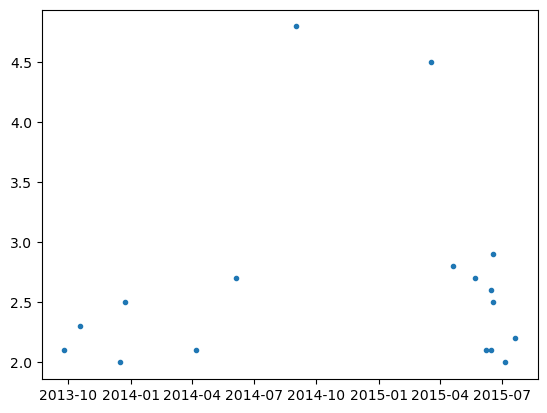

In [9]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.') 
plt.show()

AS observed, there was no usual seismic activity in the weeks leading up to the 2009 event

Let us take a closer look at the seimicity in the days leading up ot the event

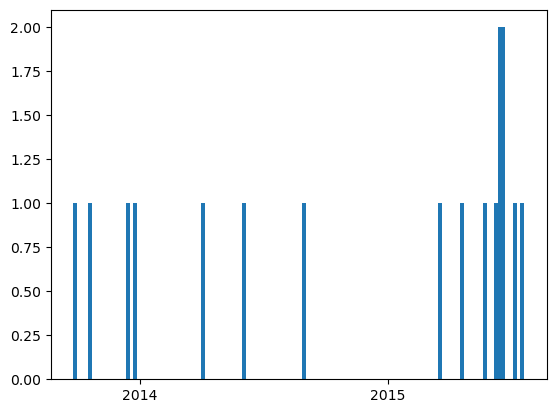

In [10]:



fig2, axes = plt.subplots(1,1) 
axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()